<a href="https://colab.research.google.com/github/tomkark/SOT_ViT/blob/main/TrainTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Compact Vision Transformer


The next colab is based on the one published by the developers of the cct&cvt from SHI LABS
 https://medium.com/pytorch/training-compact-transformers-from-scratch-in-30-minutes-with-pytorch-ff5c21668ed5

### CIFAR-10

We're going to use ``torchvision``'s CIFAR-10 dataset, which will automatically download it as well.

Its classes are: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


### Training an image classifier

We will do the following steps in order:

1. Download CIFAR-10 and load it
2. Clone the Compact Transformers repository from GitHub
3. Train the network on CIFAR-10
4. Load the trained checkpoint
5. Test the network on the test data

## 1. Loading the prerequisites

We need to import some basic requirements (PyTorch, Torchvision, and matplotlib).

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


cifar10_mean, cifar10_std = [0.4914, 0.4822, 0.4465], [0.2470, 0.2435, 0.2616]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(cifar10_mean, cifar10_std)])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

This function will plot images, their labels and the predicted labels (if specified). We'll use it as we go through.
----It will desplay (at the moment) the labels and predictions correctly only when batch size == 4----

In [2]:
def imshow(images, labels, predicted_labels=None):
    # Using torchvision to make a grid of the images
    img = torchvision.utils.make_grid(images)

    # Inverting the normalization
    img = img.permute(1, 2, 0).mul(torch.tensor(cifar10_std))
    img += torch.tensor(cifar10_mean)

    # Plotting the grid
    fig, ax = plt.subplots(figsize=(6, 24))
    plt.imshow(img)

    if predicted_labels is not None:
        # Outputing the predicted labels
        ax.set_xlabel('Predicted labels', fontsize=18, labelpad=12)
        ax.set_xticks(torch.arange(len(images)) * 35 + 20)
        ax.set_xticklabels([classes[predicted_labels[j]] 
                            for j in range(len(images))], fontsize=14)
    
    # Outputing the ground truth labels
    if(len(images)<9):
      gax = ax.secondary_xaxis('top')
      gax.set_xlabel('Ground truth', fontsize=18, labelpad=12)
      gax.set_xticks(torch.arange(len(images)) * 35 + 20)
      gax.set_xticklabels([classes[labels[j]] 
                          for j in range(len(images))], fontsize=14)
    plt.show()

## 2. Loading and normalizing CIFAR10
Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [3]:
%cd /content
batch_size = 4 #we train on 128 but for the display the default is 4

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

dataiter = iter(trainloader)
test_dataiter = iter(testloader)

/content


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


**Let's view some of the training images, for fun.** \\
Run this cell to see outputs. \\
You can run this cell multiple times.
Each run should return different images

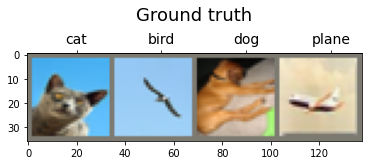

In [4]:
images, labels = dataiter.next()
imshow(images, labels)

## 3. Train CCT on CIFAR-10
We're going to clone the repository first.


In [5]:
from os.path import exists
%cd /content
if not exists("SOT_ViT"):
  !git clone https://github.com/tomkark/SOT_ViT.git
  %cd SOT_ViT

else:
  %cd SOT_ViT
  !git pull


/content
Cloning into 'SOT_ViT'...
remote: Enumerating objects: 399, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 399 (delta 102), reused 47 (delta 27), pack-reused 239
Receiving objects: 100% (399/399), 3.24 MiB | 33.89 MiB/s, done.
Resolving deltas: 100% (240/240), done.
/content/SOT_ViT


We'll train $CCT-2/3\times2$ from the paper ( $\approx 280$ K parameters) for $30$ epochs. It should take around 10 minutes (may vary depending on which GPU Colab assigns to you).

Training is fairly simple,
we'll just run `main.py` with the the appropriate args.
The script will train and logs performance and time.
ot is the regularization parameter for the Sinkhorn algorithm.

In [6]:
!pwd
if not exists("checkpoint.pth"):
  !python main.py \
        --ot=0.8 \
        --qk False \
        --SOT False \
        --model cct_2 \
        --conv-size 3 \
        --conv-layers 2 \
        --print-freq -1 \
        --epochs 30 \
        --workers 2 \
        --data ../cifar10
else:
  print("Not training")

/content/SOT_ViT
{'patch_size': 4, 'ot': 0.8, 'withSOT': False, 'qk': False}
{'patch_size': 4, 'ot': 0.8, 'withSOT': False, 'qk': False}
GPU (CUDA) Status: True, Cifar Path: ../cifar10
Files already downloaded and verified
Beginning training 0.8
[Epoch 1] 	 	 Top-1 (Train) 20.91800 	 	 Top-1 (Validate) 31.58000 	 	 Time: 0.52
[Epoch 2] 	 	 Top-1 (Train) 29.62000 	 	 Top-1 (Validate) 39.74000 	 	 Time: 0.95
[Epoch 3] 	 	 Top-1 (Train) 35.55800 	 	 Top-1 (Validate) 46.60000 	 	 Time: 1.36
[Epoch 4] 	 	 Top-1 (Train) 40.78000 	 	 Top-1 (Validate) 53.52000 	 	 Time: 1.78
[Epoch 5] 	 	 Top-1 (Train) 44.39800 	 	 Top-1 (Validate) 55.32000 	 	 Time: 2.20
[Epoch 6] 	 	 Top-1 (Train) 48.96800 	 	 Top-1 (Validate) 59.04000 	 	 Time: 2.62
[Epoch 7] 	 	 Top-1 (Train) 51.79000 	 	 Top-1 (Validate) 63.77000 	 	 Time: 3.04
[Epoch 8] 	 	 Top-1 (Train) 53.96400 	 	 Top-1 (Validate) 64.51000 	 	 Time: 3.46
[Epoch 9] 	 	 Top-1 (Train) 55.67600 	 	 Top-1 (Validate) 66.23000 	 	 Time: 3.87
[Epoch 10] 	 	 T

## 4. Evaluation
Now we're going to load our trained transformer from file. \\
The script stores checkpoints in `checkpoint.pth`.

In [7]:
from src.cct import cct_2

saved_file = "image.pt"

transformer = cct_2(img_size=32,
                    num_classes=10,
                    positional_embedding='learnable',
                    n_conv_layers=2,
                    kernel_size=3,
                    plot=True,
                    ot=0.8,
                    saved_file=saved_file,
                    withSOT=False,
                    qk=False)

transformer.load_state_dict(torch.load('checkpoint.pth'))

{'plot': True, 'ot': 0.8, 'saved_file': 'image.pt', 'withSOT': False, 'qk': False}
{'plot': True, 'ot': 0.8, 'saved_file': 'image.pt', 'withSOT': False, 'qk': False}


<All keys matched successfully>

**Test time**\\
Run this cell to evaluate the performance over the test data.\\
-For visual results run the loop once with the imshow line but make sure your batch_size==4


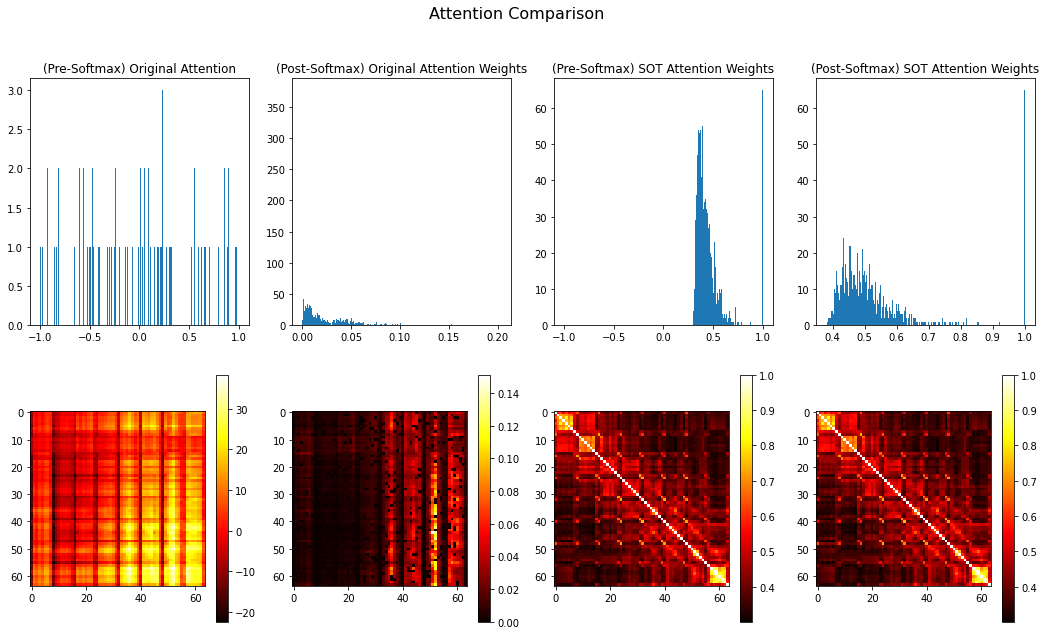

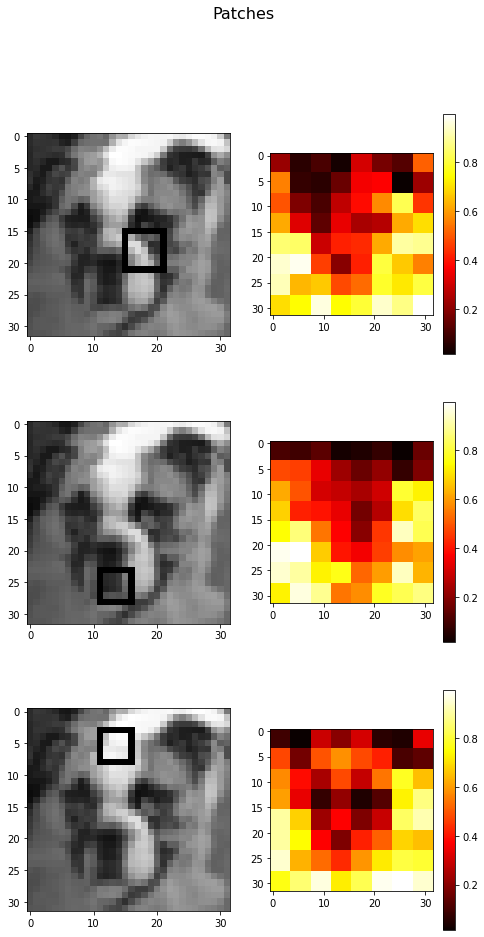

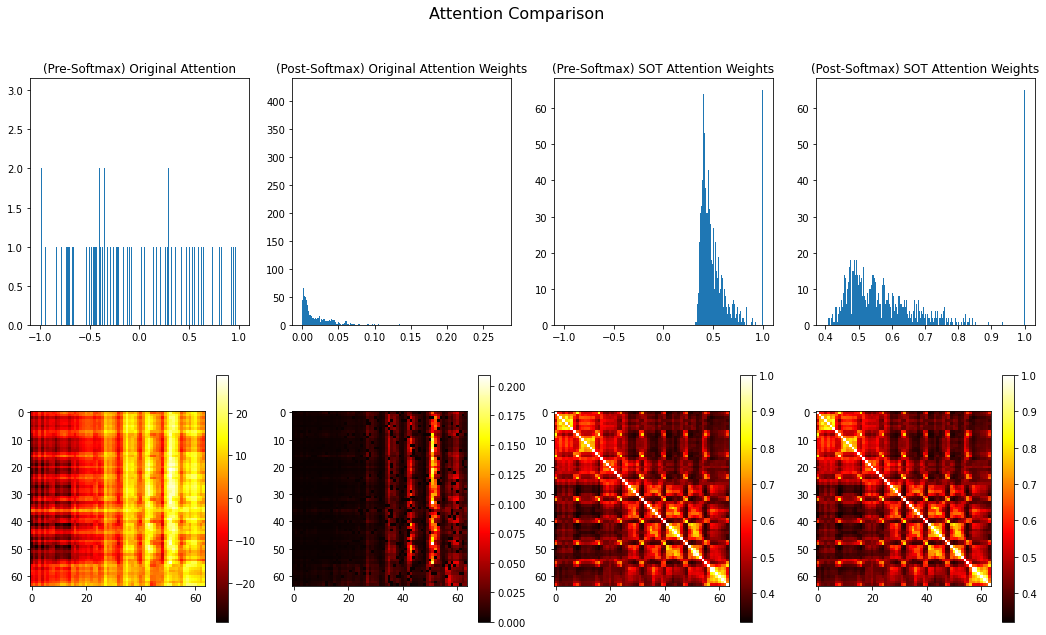

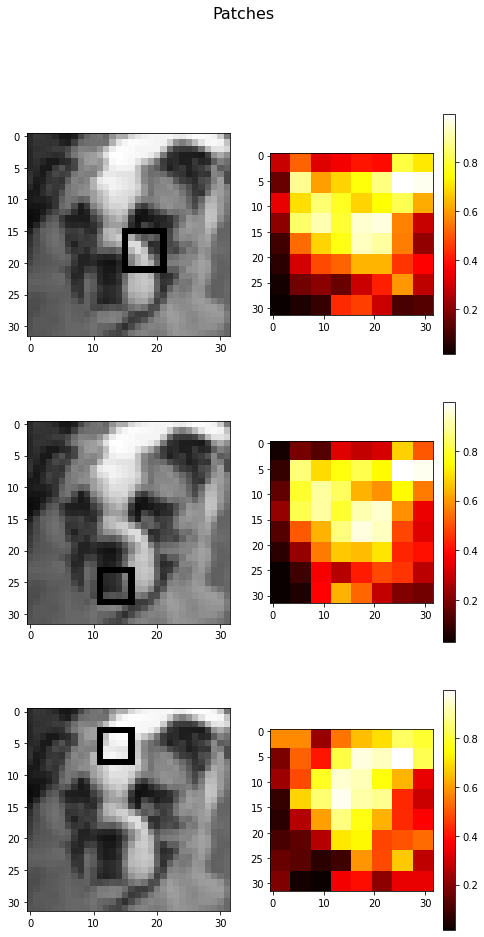

The success rate of the model over the test set (10000 images) is: 78.20


In [8]:
#The following lines can be used to "inject" specific images to the test batch 
# and inspect the heat_map in "plot" mode
images, labels = test_dataiter.next()
torch.save(images[0], saved_file)
torch.save(labels[0], "labels.pt")
images[0] = torch.load(saved_file)
labels[0] = torch.load("labels.pt")
#------
#We saw above the results during training, now we will iterate over almost all of the 10000 test images
#and print the accuracy percentage:
%matplotlib inline
result = 0
iterations = len(test_dataiter) - 1
for i in range(iterations):
  _, predicted = torch.max(transformer(images), 1)
  result += torch.sum(labels == predicted)
  images, labels = test_dataiter.next()

result = "{:.2f}".format((100*result)/(batch_size*iterations))
print("The success rate of the model over the test set ({} images) is: {}".format(batch_size*(iterations+1), result))

# imshow(images, labels, predicted)